# **Latar Belakang**
Transjakarta adalah sebuah sistem transportasi Bus Rapid Transit (BRT) pertama di Asia Tenggara dan Selatan yang beroperasi sejak tahun 2004 di Jakarta, Indonesia. TransJakarta dirancang sebagai moda transportasi massal pendukung aktivitas ibukota yang sangat padat. Dengan jalur lintasan terpanjang di dunia (251.2 km), serta memiliki 260 halte yang tersebar dalam 13 koridor, Transjakarta yang awalnya beroperasi mulai Pkl. 05.00 – Pkl. 22.00 WIB, kini beroperasi 24 jam.

## **Pernyataan Masalah**

Kota Jakarta adalah kota yang terkenal dengan kemacetannya, maka dari itu kota Jakarta berupaya agar penduduknya beralih yang tadinya menggunakan kendaraan pribadi menjadi menggunakan kendaraan umum.

Sebagai seorang Data Analyst, saya akan mencoba menjawab pertanyaan itu:

Bagaimana mengurangi kemacetan yang berada di Jakarta

In [304]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Data**

Dataset ini berisi informasi terkait jumlah penumpang transjakarta, kolom di dalam dataset TransJakarta Passengers 2021, yaitu:  

* tahun : tahun data diambil
* bulan : bulan data diambil
* jenis : jenis kendaraan
* kode_trayek: kode trayek
* trayek: rute yang dilewati oleh kendaraan
* jumlah_penumpang : jumlah penumpang


In [305]:
df = pd.read_csv('TransJakarta Passengers 2021.csv')
df

,tahun,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
0,2021,10,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197
1,2021,10,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711
2,2021,10,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186
3,2021,10,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883
4,2021,10,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,66616
...,...,...,...,...,...,...
1468,2021,11,Angkutan Umum Integrasi,11Q,Kampung Melayu - Pulo Gebang via BKT,11353
1469,2021,11,Angkutan Umum Integrasi,11D,Pulo Gebang - Pulo Gadung 2 via PIK,59155
1470,2021,11,Angkutan Umum Integrasi,10K,Tanjung Priok - Senen via Taman BMW,34498
1471,2021,11,Angkutan Umum Integrasi,GR4,Taman Kota Intan - Museum Bahari,4


## **Data Understanding and Cleaning**

In [306]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (1473, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tahun             1473 non-null   int64 
 1   bulan             1473 non-null   int64 
 2   jenis             1473 non-null   object
 3   kode_trayek       1473 non-null   object
 4   trayek            1471 non-null   object
 5   jumlah_penumpang  1473 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 69.2+ KB


In [307]:
display(df.describe(), df.describe(include='object'))

,tahun,bulan,jumlah_penumpang
count,1473.0,1473.000000,1.473000e+03
mean,2021.0,6.534963,8.167586e+04
std,0.0,3.446451,1.265331e+05
min,2021.0,1.000000,0.000000e+00
25%,2021.0,4.000000,2.501600e+04
50%,2021.0,7.000000,4.962800e+04
75%,2021.0,10.000000,7.513800e+04
max,2021.0,12.000000,1.131439e+06


,jenis,kode_trayek,trayek
count,1473,1473,1471
unique,3,135,136
top,Mikrotrans,JAK.88,Cililitan - Condet via Kayu Manis
freq,848,12,24


In [308]:
# menampilkan jumlah unik dan unique values untuk setiap kolom
pd.set_option('display.max_colwidth', None)
# data unik di tiap kolom
listItem = []
for col in df :
    listItem.append( [col, df[col].nunique(), df.sort_values(col)[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Values'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Values
0,tahun,1,[2021]
1,bulan,12,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
2,jenis,3,"[Angkutan Umum Integrasi, BRT, Mikrotrans]"
3,kode_trayek,135,"[1, 10, 10K, 11, 11D, 11Q, 12, 12A, 12B, 13, 1A, 1A , 1B, 1C, 1E, 1F, 1H, 1M, 1N, 1P, 1Q, 1R, 2, 2P, 2Q, 3, 3E, 3E , 4, 4B, 4F, 5, 5B, 5F, 5M, 6, 6C, 6F, 6H, 6M, 6N, 6Q, 6R, 7, 7A, 7B, 7D, 7P, 8, 8C, 8D, 8E, 8K, 9, 9D, 9E, 9H, GR2, GR3, GR4, GR5, JA.77, JAK,19, JAK. 10B, JAK.01, JAK.02, JAK.03, JAK.04, JAK.05, JAK.06, JAK.07, JAK.08, JAK.09, JAK.10, JAK.10A, JAK.10B, JAK.11, JAK.112, JAK.117, JAK.12, JAK.13, JAK.14, JAK.15, JAK.16, JAK.17, JAK.18, JAK.20, JAK.21, JAK.22, JAK.24, JAK.25, JAK.26, JAK.27, JAK.28, JAK.29, JAK.30, JAK.31, JAK.32, JAK.33, JAK.34, ...]"
4,trayek,136,"[Andara - Stasiun Universitas Pancasila, Batu Sari-Tanah Abang, Bintara - Cipinang Indah, Bintaro - Blok M, Blok M - Andara, Blok M - Kota, Bulak Ringin - Kampung Rambutan, Bulak Turi - Tanjung Priok, Cawang UKI - Lubang Buaya, Cempaka Putih - Pulo Gadung via Kelapa Gading, Cilangkap - Cililitan, Ciledug - Tendean, Cililitan - Condet via Kayu Manis, Cililitan - Dwikora, Cililitan - Kp. Pulo, Cilingcing - Rorotan, Cipedak - Blok M, Dukuh Atas - Casablanca via Epicentrum Raya, Dwikora - Penas Kalimalang, Gondangdia - Balai Kota, Gondangdia - Cikini via Kramat Jaya, Gondangdia - Cikini via Kramat Raya, Gondangdia - Cikini via Salemba Raya, Gondangdia - Senen, Grogol - Benhil, Grogol - Meruya via Roxy, Grogol - Pos Pengumben via Slipi, Grogol - Srengseng, Grogol - Tubagus Angke, Harapan Baru - Pulo Gebang via Rawa Kuning, Jambore Cibubur - Pasar Rebo, Joglo - Blok M, Kalibata - Kuningan, Kalideres - Muara Angke, Kalideres - Pasar Baru, Kalideres - Puri Kembangan, Kalimalang - Duren Sawit, Kampung Melayu - Ancol, Kampung Melayu - Duren Sawit, Kampung Melayu - Pondok Kelapa, Kampung Melayu - Ppulo Gadung, Kampung Melayu - Pulo Gadung, Kampung Melayu - Pulo Gebang via BKT, Kampung Melayu - Tanah Abang, Kampung Melayu - Tanah Abang via Cikini, Kampung Rambutan - Blok M, Kampung Rambutan - Kampung Melayu, Kampung Rambutan - Lebak Bulus, Kampung Rambutan - Pasar Rebo via Poncol, Kampung Rambutan - Pinang Ranti, Kampung Rambutan - Pondok Gede, Kebayoran Lama - Jelambar, Kebayoran Lama - Tanah Abang, Kelapa Gading - Rusun Kemayoran, Kota Tua Explorer, Kp. Rambutan - Kalisari, Kp. Rambutan - Taman Wiladatika, Lebak Bulus - Andara, Lebak Bulus - Cipulir, Lebak Bulus - Harmoni, Lebak Bulus - Petukangan, Lebak Bulus - Ragunan, Lenteng Agung - Aseli, Meruya - Blok M, PIK - Balai Kota, Pancoran - TMII, Pangkalan Jati - Rawamangun, Pantai Maju - Balai Kota, Pasar Minggu - Ciganjur via KB Ragunan, Pasar Minggu - Jagakarsa, Pasar Minggu - Tanah Abang, Pelabuhan Kaliadem - Kota, Penjaringan - Sunter Bouleverd Barat, Pesanggrahan - Blok M, Pinang Ranti - Kampung Rambutan, Pinang Ranti - Pluit, Pinang Ranti - Pulo Gadung, Pluit - Senen, Pondok Labu - Blok M, Pondok Kelapa - BKN, Pulo Gadung - Kota, Pulo Gadung 1 - Harmoni, Pulo Gadung 2 - Tosari, Pulo Gebang - Kampung Melayu, Pulo Gebang - Pulo Gadung 2 via PIK, Pulo Gebang - Rorotan, Pulo Ggadung 2 - Tosari, Puri Kembangan - Sentraland Cengkareng, Ragunan - Blok M via Kemang, Ragunan - Departemen Pertanian, Ragunan - Dukuh Atas 2, Ragunan - Stasin MRT Fatmawati, Rawa Buaya - Rawa Kompeni, Rawamangun - Duren Sawit, Rawamangun - Klender, Rawamangun - Tanah Merah, Rempoa - Blok M, Roxy - Benhil, Roxy Mas - Karet, Semper - Rorotan, ...]"
5,jumlah_penumpang,1420,"[0, 1, 3, 4, 7, 8, 11, 14, 15, 17, 21, 22, 24, 33, 76, 91, 176, 261, 377, 608, 901, 1026, 1186, 1386, 1456, 1463, 1473, 1780, 1802, 1955, 2029, 2135, 2157, 2497, 2828, 3136, 3406, 3603, 3862, 3945, 4008, 4085, 4405, 4465, 4484, 4641, 4653, 4965, 5409, 5602, 5649, 5714, 5854, 5936, 6022, 6075, 6090, 6123, 6130, 6363, 6395, 6413, 6416, 6465, 6618, 6629, 6849, 6867, 6886, 6932, 7245, 7434, 7598, 7611, 7796, 7829, 7862, 7866, 7914, 8008, 8122, 8145, 8148, 8238, 8308, 8440, 8456, 8474, 8493, 8

Secara umum, kita bisa melihat bahwa:
* dataset TransJakarta Passengers 2021 memiliki 6 kolom dan 1473 baris
* kolom 'trayek' memiliki data kosong. Data kosong pada kolom tersebut diwakili dengan data NaN yang bisa diisi berdasarkan data 'kode_trayek' kode trayeknya.
* kolom 'tahun' berisikan hanya pada tahun 2021 saja, sehingga bisa dihapus saja.
* kolom 'kode_trayek' dan 'trayek' memiliki nomor unik yang berbeda. Saya asumsikan ada salah ketik.
* kolom 'jumlah_penumpang' memiliki data anomali yang berisikan nilai 0, tetapi tidak saya isi dan drop

### **Drop**

In [309]:
# mendrop kolom tahun karena data hanya ada pada tahun 2021 saja
df.drop(columns='tahun', axis=1, inplace=True)
df.head()

,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
0,10,Mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,31197
1,10,Mikrotrans,JAK.85,Bintara - Cipinang Indah,30711
2,10,Mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,40186
3,10,Mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,61883
4,10,Mikrotrans,JA.77,Tanjung Priok - Jembatan Item,66616


### Missing Value

In [310]:
# mengecek missing value
df[df['trayek'].isna()]

,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
795,12,Mikrotrans,JAK.10B,NaN,4085
796,12,Mikrotrans,JAK.10A,NaN,33992


In [311]:
# mengisi missing value 'trayek' berdasarkan 'kode_trayek'
df.loc[795, 'trayek'] = 'Gondangdia - Cikini via Kramat Raya'
df.loc[796, 'trayek'] = 'Gondangdia - Cikini via Salemba Raya'

### Miss Type

In [312]:
# Mengecek salah ketik pada kolom trayek

# Hitung jumlah trayek unik untuk setiap kode trayek
miss_type_trayek = df.groupby('kode_trayek')['trayek'].nunique()

# Cetak kode trayek yang memiliki lebih dari satu trayek
print(miss_type_trayek[miss_type_trayek > 1])

kode_trayek
1A        2
3E        2
4         2
JAK.01    2
JAK.41    2
Name: trayek, dtype: int64


In [313]:
# mengisi trayek dengan 1A yang sebelumnya ada 'PIK - Balai Kota' dan 'Pantai Maju - Balai Kota' menjadi --> 'Pantai Maju - Balai Kota'
df['trayek']= df['trayek'].str.replace('PIK - Balai Kota', 'Pantai Maju - Balai Kota')

# mengisi trayek dengan 3E yang sebelumnya ada 'Sentraland Cengkareng - Puri Kembangan' dan 'Puri Kembangan - Sentraland Cengkareng' menjadi --> 'Sentraland Cengkareng - Puri Kembangan'
df['trayek']= df['trayek'].str.replace('Puri Kembangan - Sentraland Cengkareng', 'Sentraland Cengkareng - Puri Kembangan')

# mengisi trayek dengan 4 yang sebelumnya ada 'Pulo Gadung 2 - Tosari' dan 'Pulo Ggadung 2 - Tosari' menjadi --> 'Pulo Gadung 2 - Tosari'
df['trayek']= df['trayek'].str.replace('Pulo Ggadung 2 - Tosari', 'Pulo Gadung 2 - Tosari')

# mengisi trayek dengan 4 yang sebelumnya ada 'Tanjung Priok - Plumpang' dan 'Ttanjung Priok - Plumpang' menjadi --> 'Tanjung Priok - Plumpang'
df['trayek']= df['trayek'].str.replace('Ttanjung Priok - Plumpang', 'Tanjung Priok - Plumpang')

# mengisi trayek dengan 4 yang sebelumnya ada 'Kampung Melayu - Pulo Gadung' dan 'Kampung Melayu - Ppulo Gadung' menjadi --> 'Kampung Melayu - Pulo Gadung'
df['trayek']= df['trayek'].str.replace('Kampung Melayu - Ppulo Gadung', 'Kampung Melayu - Pulo Gadung')

In [314]:
# Mengecek salah ketik pada kolom kode_trayek

# Hitung jumlah trayek unik untuk setiap kode trayek
miss_type_kode_trayek = df.groupby('trayek')['kode_trayek'].nunique()

# Cetak kode trayek yang memiliki lebih dari satu trayek
print(miss_type_kode_trayek[miss_type_kode_trayek > 1])

trayek
Cililitan - Condet via Kayu Manis         2
Pantai Maju - Balai Kota                  2
Sentraland Cengkareng - Puri Kembangan    2
Tanjung Priok - Jembatan Item             2
Name: kode_trayek, dtype: int64


In [315]:
# mengubah 'kode_trayek' yang sebelumnya 'trayek' 'Cililitan - Condet via Kayu Manis' ada 2 'kode_trayek' 'JAK.37' dan 'JAK.16'
# menjadi 'kode_trayek' 'JAK.37' masih tetap 'Cililitan - Condet via Kayu Manis', tetapi 'kode_trayek' 'JAK.16' menjadi --> Cililitan - Condet
df['trayek'] = np.where(df['kode_trayek']== 'JAK.16', 'Cililitan - Condet', df['trayek'])

# mengubah 'kode_trayek' yang sebelum nya ada 2 '1A' dan '1A ' menjadi --> '1A'
df['kode_trayek']= df['kode_trayek'].str.replace('1A ', '1A')

# mengubah 'kode_trayek' yang sebelum nya ada 2 '3E' dan '3E ' menjadi --> '3E'
df['kode_trayek']= df['kode_trayek'].str.replace('3E ', '3E')

# mengubah 'kode_trayek' yang sebelum nya ada 2 'JA.77' dan 'JAK.77' menjadi --> 'JAK.77'
df['kode_trayek']= df['kode_trayek'].str.replace('JA.77', 'JAK.77')

### Sort by month

In [316]:
df = df.sort_values(['bulan', 'jenis']).reset_index(drop=True)
df

,bulan,jenis,kode_trayek,trayek,jumlah_penumpang
0,1,Angkutan Umum Integrasi,GR5,Kota Tua Explorer,261
1,1,Angkutan Umum Integrasi,GR4,Taman Kota Intan - Museum Bahari,76
2,1,Angkutan Umum Integrasi,9E,Kebayoran Lama - Jelambar,15039
3,1,Angkutan Umum Integrasi,9D,Pasar Minggu - Tanah Abang,75918
4,1,Angkutan Umum Integrasi,8K,Batu Sari-Tanah Abang,6867
...,...,...,...,...,...
1468,12,Mikrotrans,JAK.05,Semper - Rorotan,74100
1469,12,Mikrotrans,JAK.04,Grogol - Tubagus Angke,57870
1470,12,Mikrotrans,JAK.03,Lebak Bulus - Andara,43991
1471,12,Mikrotrans,JAK.02,Kampung Melayu - Duren Sawit,59985


# Data Analysis

**Popularity of Transport Types**

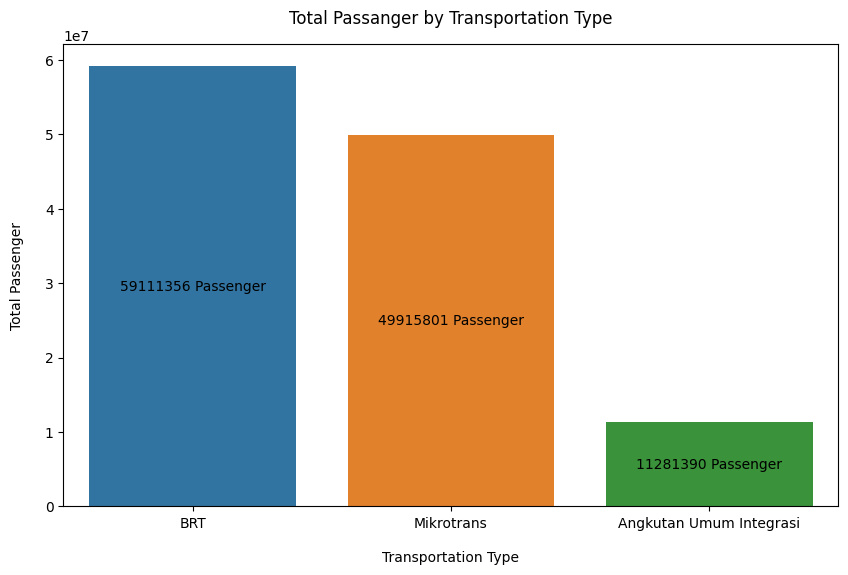

In [317]:
df_tipe = df.groupby('jenis')[['jumlah_penumpang']].sum().reset_index().sort_values(by='jumlah_penumpang', ascending=False)

plt.figure(figsize=(10,6))

ax = sns.barplot(data=df_tipe, x='jenis', y='jumlah_penumpang', errorbar= None, estimator='sum')

plt.title('Total Passanger by Transportation Type', pad=15)
plt.xlabel('Transportation Type', size=10, labelpad=15)
plt.ylabel('Total Passenger', size=10, labelpad=15)
ax.bar_label(ax.containers[0], label_type='center', fmt=lambda x: f'{int(x)} Passenger')

plt.show()

Dari visualisasi diatas terlihat disini bahwa transportasi umum yang paling digemari adalah BRT, diikuti Mikrotrans, dan yang terakhir adalah angkutan umum integrasi

* BRT : 59.111.356 penumpang
* Mikrotrans : 49.915.801 penumpang
* Angkutan Umum Integrasi : 11.281.390 penumpang

- BRT menjadi transportasi yang paling digemari dikarenakan tarif nya cukup murah di kisaran Rp 2.000 - 3.500. Selain tarif nya yang cukup murah BRT mempunyai jalur sendiri yang disebut *Busway* yang bisa menghindari kemacetan di Jakarta.
- Mikrotrans menjadi ke2 yang digemari karena tarifnya yang masih gratis, dan berbeda dengan angkot yang lainnya mikrotrans memberikan fasilitas AC dan fasilitas-fasilitas keamanan yang lainnya
- Sedangkan yang angkutan umum integrasi (non-BRT) dikenakan tarif Rp3.500 - Rp10.000. Sebenarnya untuk jenis kendaraan dan fasilitas sama dengan BRT yaitu bis, tetapi perbedaanya adalah non-BRT ini tidak memiliki jalur khusus

Sumber :
- https://www.kompas.com/tren/read/2022/02/02/103000765/mengenal-mikrotrans-angkot-ber-ac-di-jakarta-dengan-segudang-fasilitas?page=all
- https://metro.sindonews.com/read/948639/171/perbedaan-brt-dan-non-brt-yang-harus-diketahui-penumpang-transjakarta-1669111894#:~:text=Fitur%20utama%20yang%20dimiliki%20BRT,melayani%20penumpangnya%20di%20jalur%20umum.
- https://transjakarta.co.id/produk-dan-layanan/info-tiket/
- https://www.antaranews.com/berita/2284978/tarif-integrasi-jaklingko-mempermudah-mobilitas-masyarakat
- https://megapolitan.kompas.com/read/2022/08/12/07131771/fakta-fakta-soal-tarif-integrasi-transportasi-umum-di-jakarta-biaya?page=all

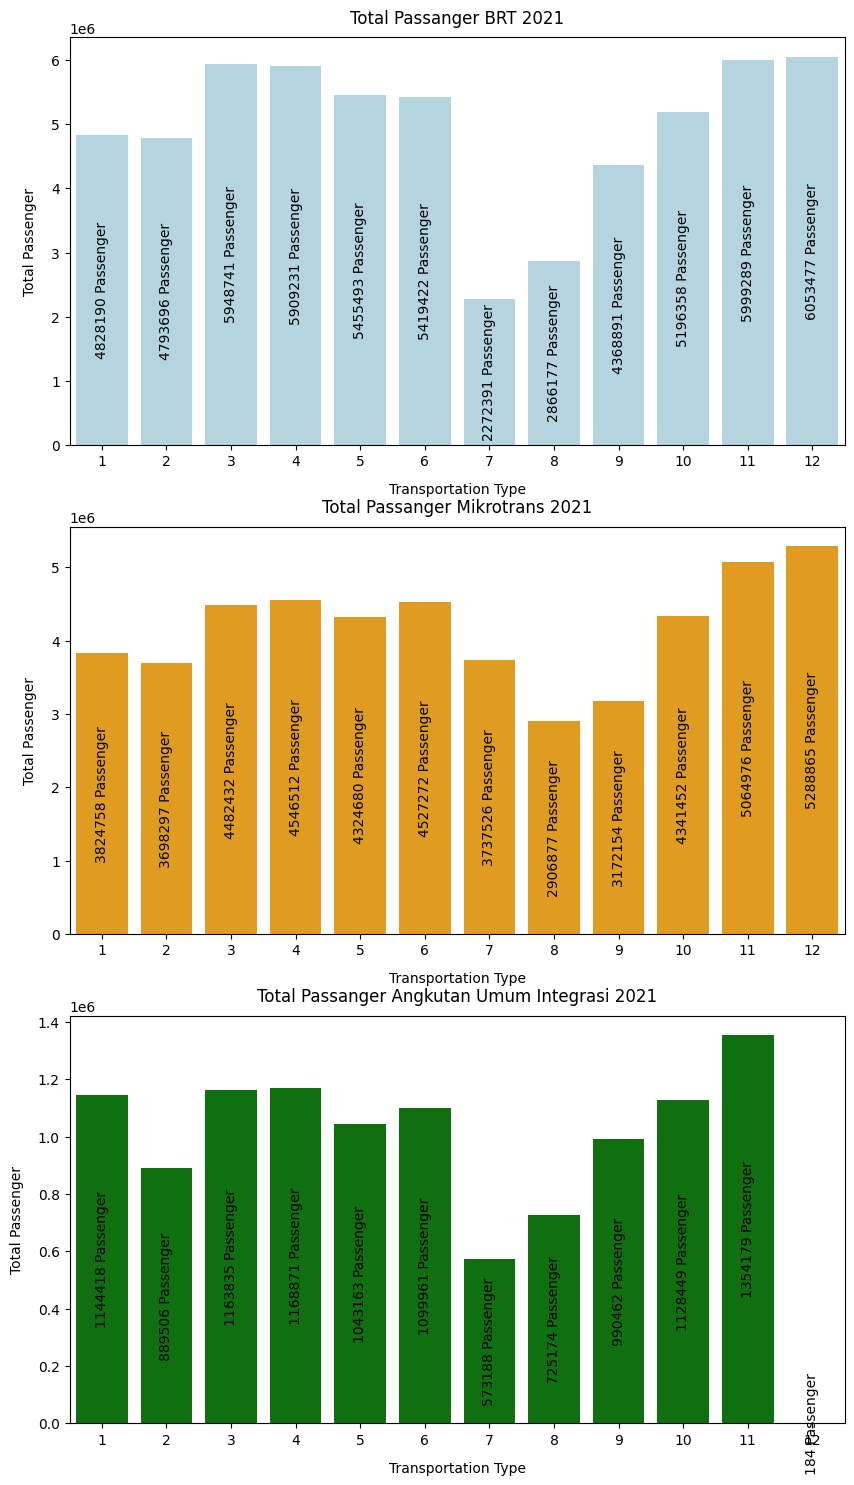

In [319]:
df_BRT = df[df['jenis'] =='BRT']
df_Mikrotrans = df[df['jenis'] =='Mikrotrans']
df_non_BRT = df[df['jenis'] =='Angkutan Umum Integrasi']

plt.figure(figsize=(10,18))

plt.subplot(3,1,1)
ax = sns.barplot(data=df_BRT, x='bulan', y='jumlah_penumpang', errorbar= None, estimator='sum', color='lightblue')
plt.title('Total Passanger BRT 2021', pad=10)
plt.xlabel('Transportation Type', size=10, labelpad=10)
plt.ylabel('Total Passenger', size=10, labelpad=10)
ax.bar_label(ax.containers[0], label_type='center',rotation = 'vertical', fmt=lambda x: f'{int(x)} Passenger')

plt.subplot(3,1,2)
ax = sns.barplot(data=df_Mikrotrans, x='bulan', y='jumlah_penumpang', errorbar= None, estimator='sum', color='orange')
plt.title('Total Passanger Mikrotrans 2021', pad=10)
plt.xlabel('Transportation Type', size=10, labelpad=10)
plt.ylabel('Total Passenger', size=10, labelpad=10)
ax.bar_label(ax.containers[0], label_type='center',rotation = 'vertical', fmt=lambda x: f'{int(x)} Passenger')

plt.subplot(3,1,3)
ax = sns.barplot(data=df_non_BRT, x='bulan', y='jumlah_penumpang', errorbar= None, estimator='sum', color='green')
plt.title('Total Passanger Angkutan Umum Integrasi 2021', pad=10)
plt.xlabel('Transportation Type', size=10, labelpad=10)
plt.ylabel('Total Passenger', size=10, labelpad=10)
ax.bar_label(ax.containers[0], label_type='center',rotation = 'vertical', fmt=lambda x: f'{int(x)} Passenger')
plt.show()

Dari visualisasi di atas bisa kita lihat bahwa dari ketiga jenis transportasi umum memiliki proporsi penumpang yang cukup mirip di tiap bulannya. Dan terjadi penururan yang signifikan di bulan 7 untuk setiap jenis transportasi umum saya asumsikan pada bulan 7 di Jakarta sedang mengalami kenaikan kasus covid 19, maka dari itu diberlakukan PPKM dan terjadi penuruan yang signifikan. Pada dasarnya tahun 2021 di Indonesia sendiri statusnya memang masih belum bebas covid 19.

Dan terjadi anomali juga di angkutan umum integrasi pada bulan 12 hanya mendapat total penumpang 184

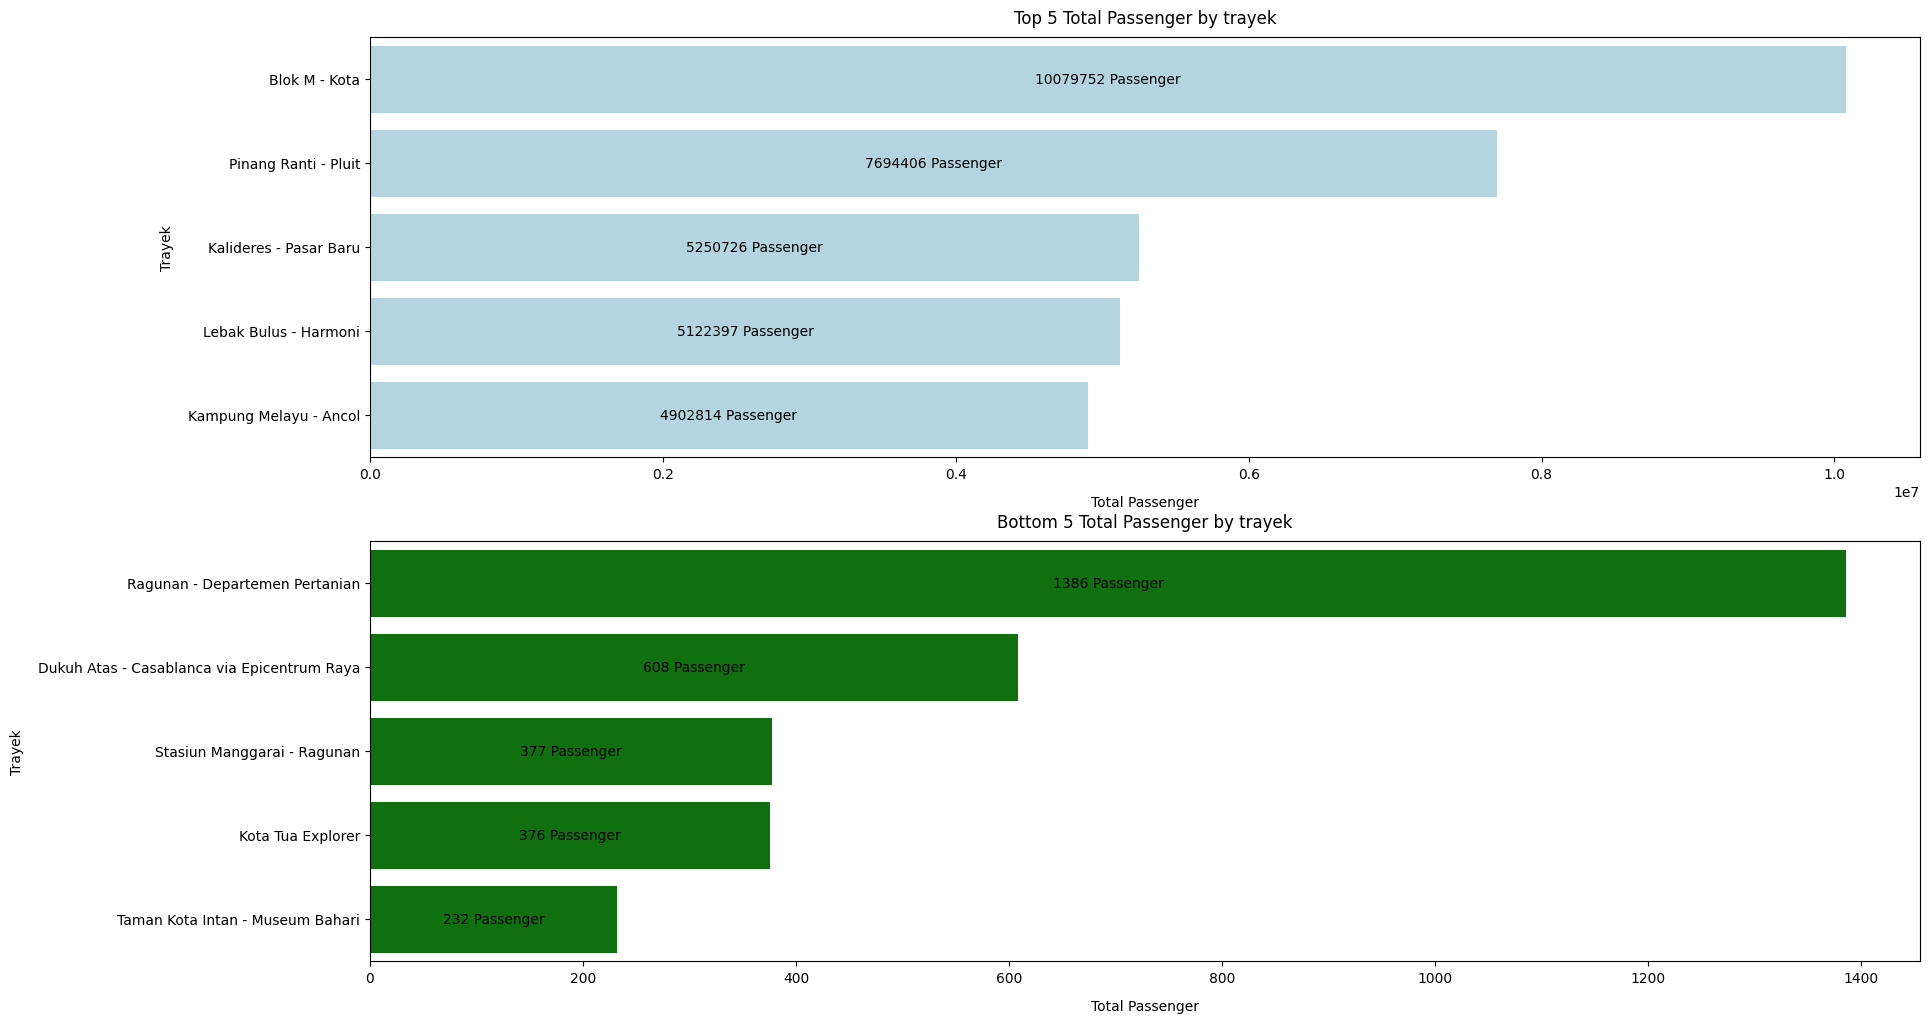

In [323]:
top_5 = df.groupby('trayek')['jumlah_penumpang'].sum().reset_index().sort_values('jumlah_penumpang', ascending=False).head(5)
bottom_5 = df.groupby('trayek')['jumlah_penumpang'].sum().reset_index().sort_values('jumlah_penumpang',ascending=False).tail(5)

plt.figure(figsize=(20,12))

plt.subplot(2,1,1)
ax = sns.barplot(data=top_5, x='jumlah_penumpang', y='trayek', errorbar= None, estimator='sum', color='lightblue')
plt.title('Top 5 Total Passenger by trayek', pad=10)
plt.xlabel('Total Passenger', size=10, labelpad=10)
plt.ylabel('Trayek', size=10, labelpad=10)
ax.bar_label(ax.containers[0], label_type='center', fmt=lambda x: f'{int(x)} Passenger')

plt.subplot(2,1,2)
ax = sns.barplot(data=bottom_5, x='jumlah_penumpang', y='trayek', errorbar= None, estimator='sum', color='green')
plt.title('Bottom 5 Total Passenger by trayek', pad=10)
plt.xlabel('Total Passenger', size=10, labelpad=10)
plt.ylabel('Trayek', size=10, labelpad=10)
ax.bar_label(ax.containers[0], label_type='center', fmt=lambda x: f'{int(x)} Passenger')
plt.show()

Dari visualisasi di atas kita bisa mengetahui bahwa :

- Rute yang paling banyak penumpangnya adalah 'Blok M - Kota' = Mencapai 10.079.752 penumpang. Ini dikarenakan rute 'Blok M - Kota' melewati beberapa lokasi yang ikonik di Jakarta, misalnya monas, bunderan HI, gelora bung karno

- Rute yang paling sedikit penumpangnya adalah 'Taman Kota Intan - Museum Bahari' = hanya 232 penumpang 

sumber :
- https://smk.transjakarta.co.id/aset/berkas/peta/104159-20230305152450-1678004690_0594786571b0037bbfeb.jpg

# **Kesimpulan**
Berdasarkan dari analasisi dilakukan, dapat disimpulkan bahwa :
- BRT menjadi transportasi umum favorit di jakarta
- Bulan 12 pada setiap transportasi umum adalah jumlah terbanyak, kecuali transportasi angkutan umum integrasi
- Rute yang paling banyak jumlah penumpangnya adalah rute 'Blok M - Kota' sebanyak = 10.079.752 penumpang ini adalah jenis transportasi umum BRT
- Rute yang paling sedikit penumpangnya adalah 'Taman Kota Intan - Museum Bahari' = hanya 232 penumpang ini adalah jenis transportasi umum non-BRT

# **Rekomendasi**
Berdasarkan dari analisis dan data diatas :
- Saya rekomendasikan untuk mengalihkan armada dari rute yang jumlah penumpangnya paling sedikit, dialokasikan ke rute yang penumpangnya paling banyak. rekomendasi ini hanya berlaku untuk jenis transportasi umum BRT dan non BRT yang pada dasarnya memiliki tipe yang sama yaitu adalah bis. Hal ini berupaya agar keadaan di dalam bis lebih kondusif dan kebagian tempat duduk semua.
- Dan saya juga merekomendasikan untuk adanya tarif pada transportasi umum mikrotrans yang sebelumnya gratis, tarif tersebut dapat digunakan untuk pengembangan transportasi umum yang lainnya. Agar kenyamanan dan keamanan penumpang bisa dipertahankan atau mungkin ditingkatkan. Dengan dikenalnya transportasi umum Jakarta yang aman, nyaman dan murah, diharapkan orang-orang beralih menggunakan transportasi umum.